# Business case study of a technology-driven mobility platform

### Goal
1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market ?
    - To understand which are the various factors affecting the demand for shared electric cycles in the Indian market.
2. How well those variables describe the electric cycle demands ?
    - To compare the impact of those factors affecting the demand compared with other factors.

### Importing necessary libraries

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_ind, ttest_rel, f_oneway, kruskal, chisquare, chi2_contingency, levene, shapiro, normaltest

### Reading the CSV file and creating a dataframe

In [2]:
df = pd.read_csv(r"D:\01 STUDY MATERIALS\SCALER\Core Module\Yulu - Biz case\Yulu-dataset.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## Exploratory Analysis

### Non-graphical Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Observations:**
- The dataframe has **10886 rows and 11 columns**,
- The data looks clean and has **no null values**,
- The **datetime** column only is in **object** data type and the rest of all the columns are in **float** and **int** data types
- The **season, holiday, workingday and weather** columns are categorical variables, but they are in **int** format and all others are numerical variables.

Let's convert the datetime column to **datetime dtype**

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Lets check for the unique values and their counts in those categorical columns

In [6]:
cat_columns = ['season', 'holiday', 'workingday', 'weather']
for i in cat_columns:
    print("\033[1m"+i.upper()+"\033[0m")
    print(df[i].value_counts())
    print('='*30)

SEASON
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
HOLIDAY
0    10575
1      311
Name: holiday, dtype: int64
WORKINGDAY
1    7412
0    3474
Name: workingday, dtype: int64
WEATHER
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


#### Categorization

Let's create the categories of those categorical columns for easy understanding during analysis.

**Season_cat**

In [7]:
df['season_cat'] = pd.cut(df['season'], bins = [0,1,2,3,4], labels = ['spring', 'summer', 'fall', 'winter'])
df['season_cat'].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season_cat, dtype: int64

**Holiday_cat**

In [8]:
df['holiday_cat'] = pd.cut(df['holiday'], bins = [0,1,2], right = False, labels = ['no', 'yes'])
df['holiday_cat'].value_counts()

no     10575
yes      311
Name: holiday_cat, dtype: int64

**Workingday_cat**

In [9]:
df['workingday_cat'] = pd.cut(df['workingday'], bins = [0,1,2], right = False, labels = ['no', 'yes'])
df['workingday_cat'].value_counts()

yes    7412
no     3474
Name: workingday_cat, dtype: int64

**Weather_cat**

In [10]:
df['weather_cat'] = pd.cut(df['weather'], bins = [0,1,2,3,4], labels = ['clear', 'mist', 'light snow/rain', 'heavy snow/rain'])
df['weather_cat'].value_counts()

clear              7192
mist               2834
light snow/rain     859
heavy snow/rain       1
Name: weather_cat, dtype: int64

The **heavy snow/rain** weather category has only one entry. It will not be sufficient for analysis, so we can remove that entry.

In [11]:
df.drop(df[df['weather_cat']=='heavy snow/rain'].index, inplace = True)

In [12]:
df['weather_cat'].value_counts()

clear              7192
mist               2834
light snow/rain     859
heavy snow/rain       0
Name: weather_cat, dtype: int64

Let's create a final dataframe with only important columns that we are interested in for analysis

In [13]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'season_cat', 'holiday_cat', 'workingday_cat', 'weather_cat'],
      dtype='object')

In [14]:
df = df[['datetime', 'atemp', 'humidity', 'windspeed', 'season_cat', 'holiday_cat', 'workingday_cat', 'weather_cat', 'count']]
df

,datetime,atemp,humidity,windspeed,season_cat,holiday_cat,workingday_cat,weather_cat,count
0,2011-01-01 00:00:00,14.395,81,0.0000,spring,no,no,clear,16
1,2011-01-01 01:00:00,13.635,80,0.0000,spring,no,no,clear,40
2,2011-01-01 02:00:00,13.635,80,0.0000,spring,no,no,clear,32
3,2011-01-01 03:00:00,14.395,75,0.0000,spring,no,no,clear,13
4,2011-01-01 04:00:00,14.395,75,0.0000,spring,no,no,clear,1
...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,19.695,50,26.0027,winter,no,yes,clear,336
10882,2012-12-19 20:00:00,17.425,57,15.0013,winter,no,yes,clear,241
10883,2012-12-19 21:00:00,15.910,61,15.0013,winter,no,yes,clear,168
10884,2012-12-19 22:00:00,17.425,61,6.0032,winter,no,yes,clear,129


Let's check the statistical summary of the dataframe using describe function.

In [15]:
df.describe(include = 'all', datetime_is_numeric = True)

,datetime,atemp,humidity,windspeed,season_cat,holiday_cat,workingday_cat,weather_cat,count
count,10885,10885.000000,10885.000000,10885.000000,10885,10885,10885,10885,10885.000000
unique,NaN,NaN,NaN,NaN,4,2,2,3,NaN
top,NaN,NaN,NaN,NaN,winter,no,yes,clear,NaN
freq,NaN,NaN,NaN,NaN,2734,10574,7411,7192,NaN
mean,2011-12-27 05:54:35.222783744,23.656213,61.884244,12.800020,NaN,NaN,NaN,NaN,191.576665
min,2011-01-01 00:00:00,0.760000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000
25%,2011-07-02 07:00:00,16.665000,47.000000,7.001500,NaN,NaN,NaN,NaN,42.000000
50%,2012-01-01 20:00:00,24.240000,62.000000,12.998000,NaN,NaN,NaN,NaN,145.000000
75%,2012-07-01 13:00:00,31.060000,77.000000,16.997900,NaN,NaN,NaN,NaN,284.000000
max,2012-12-19 23:00:00,45.455000,100.000000,56.996900,NaN,NaN,NaN,NaN,977.000000


**Observations:**
- The data given ranges from the date - 1<sup>st</sup> of Jan, 2011 to 19<sup>th</sup> of Dec, 2012
- There are two temperature columns in the data, but **atemp**(feeling temperature) column will be good for analysis and it ranges from 0.76 degree celsius to 45.45 degree celsius. The mean and the meadian of the temperatures are almost close, so there might be no or few outliers only.
- The humidity ranges from 0 to 100 and there is no big gap between mean and median. So there might be no or only few outliers in this column too.
- The total count per hour ranges from 1 to 977 with an average of 191.5 and there is a gap between mean and median of the total count, so there might be some outliers in the data.
- It seems that 68% of the given data are from working days and only 2% from holidays.


## Visual Analysis

### Univariate analysis

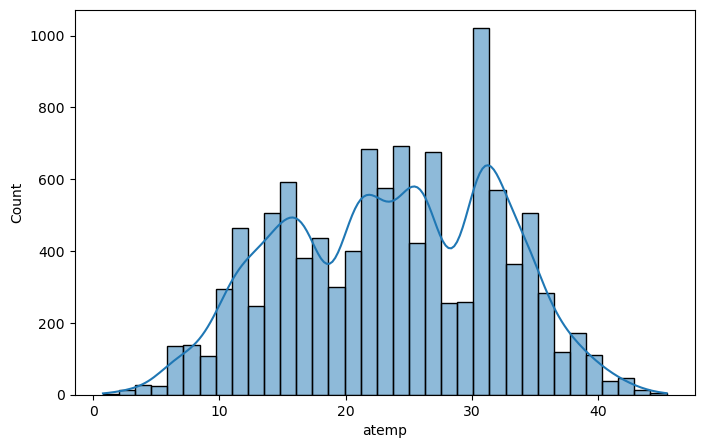

In [16]:
# Plotting the histogram of atemp column
plt.figure(figsize = (8,5))
sns.histplot(df['atemp'], kde = True)
plt.show()

**Observation:**
- The distribution has 4 different peaks, this is due to the varying temperatures in 4 different seasons

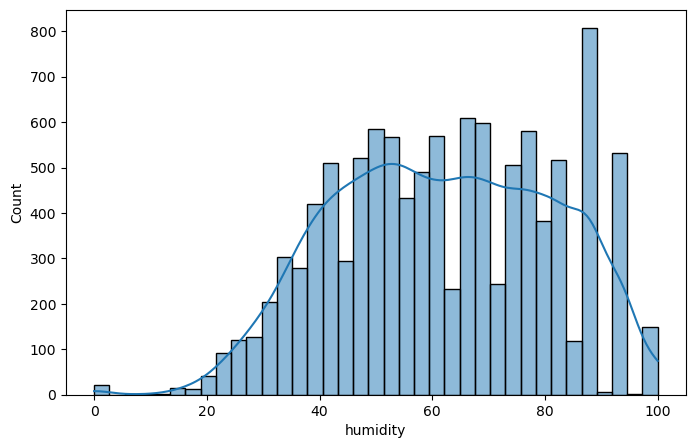

In [17]:
# Plotting the histogram of humidity column
plt.figure(figsize = (8,5))
sns.histplot(df['humidity'], kde = True)
plt.show()

**Observation:**
- The distribution of humidity looks left skewed, which means there is some outliers in the low humidity values

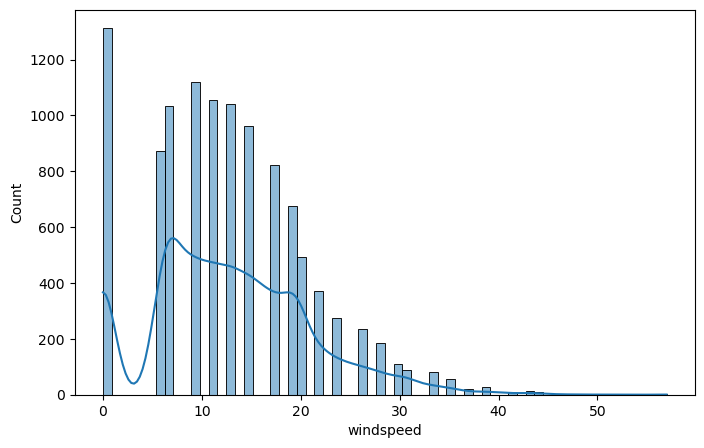

In [18]:
# Plotting the histogram of windspeed column
plt.figure(figsize = (8,5))
sns.histplot(df['windspeed'], kde = True)
plt.show()

**Observation:**
- The distribution of windspeed also has 3 different peaks which might be due to the varying windspeeds in different weather conditions

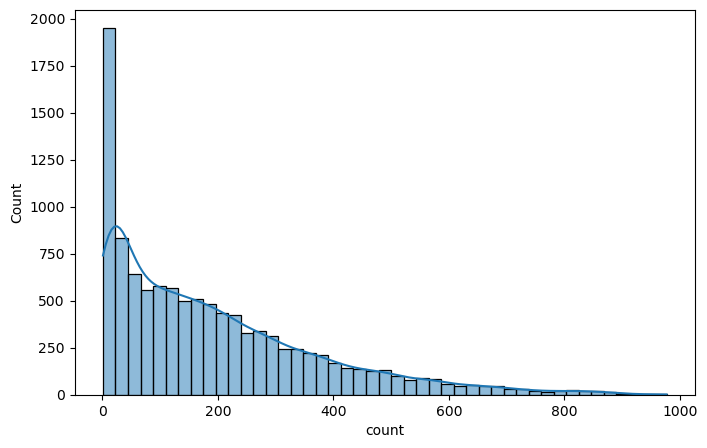

In [19]:
# Plotting the histogram of total count column
plt.figure(figsize = (8,5))
sns.histplot(df['count'], kde = True)
plt.show()

**Observation:**
- The distribution of the count column looks right skewed and look like log normal distribution

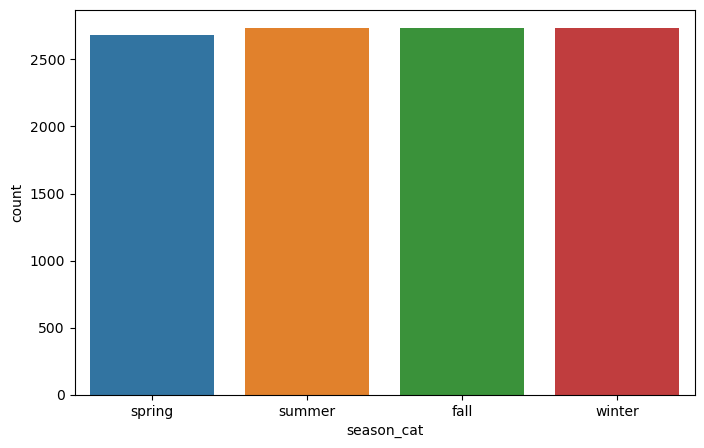

In [20]:
# Plotting the countplot of season_cat column
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'season_cat')
plt.show()

**Observation:**
- The dataframe has almost equal number of rows from all 4 seasoon categories

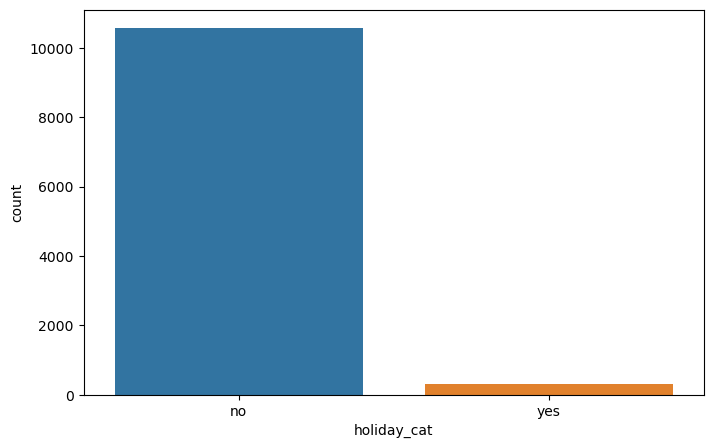

In [21]:
# Plotting the countplot of holiday_cat column
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'holiday_cat')
plt.show()

**Observation**
- Almost 98% of the data is from non holidays

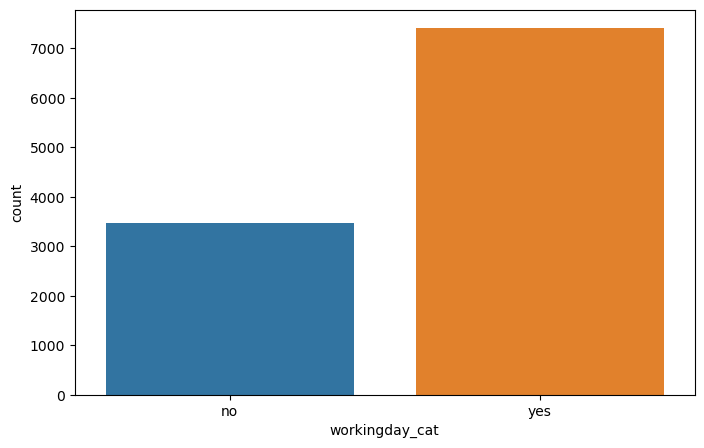

In [22]:
# Plotting the countplot of workingday_cat column
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'workingday_cat')
plt.show()

**Observation**
- Almost 70% of the data is from working days

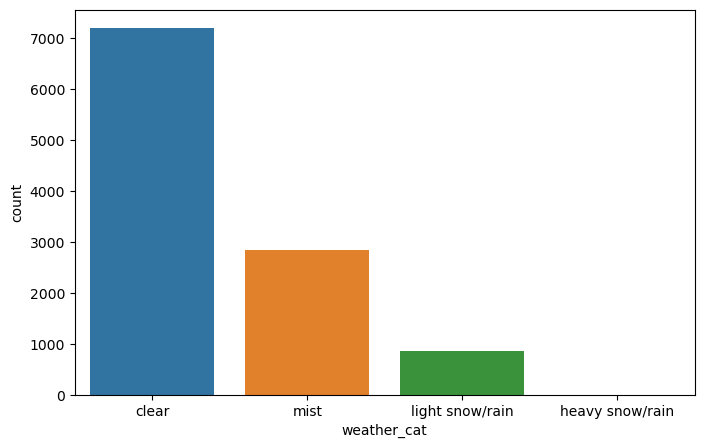

In [23]:
# Plotting the countplot of weather_cat column
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'weather_cat')
plt.show()

**Observation**
- The weather is clear in almost 65% of the data

### Bivariate analysis

#### Workingday Vs Count

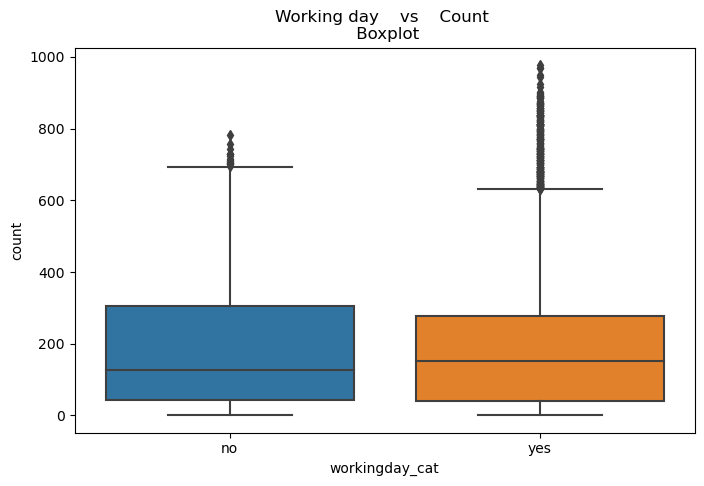

In [24]:
# Boxplot for workingday vs count
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = 'workingday_cat', y = 'count')
plt.title('Working day    vs    Count \n Boxplot')
plt.show()

**Observation**
- The working day and non working day both has almost same range of distribution and the median of them are also almost same. So the working day has no significant effect on the number of cycles rented

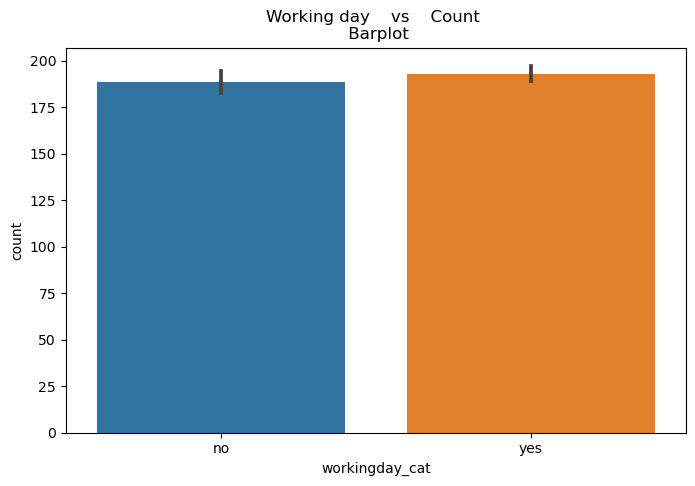

In [25]:
# Barplot for workingday vs count
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = 'workingday_cat', y = 'count')
plt.title('Working day    vs    Count \n Barplot')
plt.show()

**Observation**
- The barplot also shows the same that the average number of cycles rented on working day and the non working day are almost same. So it again confirms that working day has no significant effect on count in our given sample

#### Season Vs Count

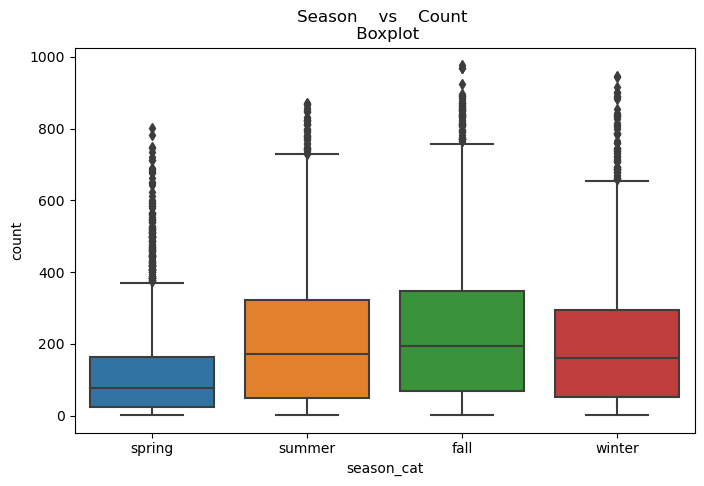

In [26]:
# Boxplot for season vs count
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = 'season_cat', y = 'count')
plt.title('Season    vs    Count \n Boxplot')
plt.show()

**Observation**
- The median count of the cycles rented is low in the spring season compared with all other seasons
- The median count of the cycles rented is more in the fall season compared with all other seasons

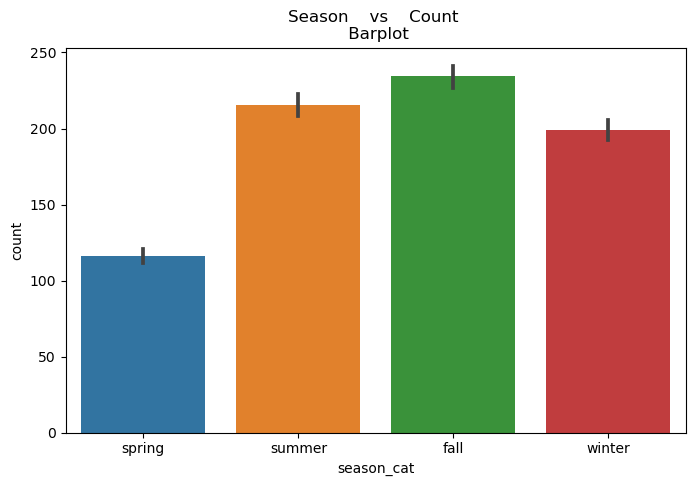

In [27]:
# Barplot for season vs count
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = 'season_cat', y = 'count')
plt.title('Season    vs    Count \n Barplot')
plt.show()

**Observation**
- The barplot also confirms the same that the average cycles rented is more in the fall season and less in the spring season in our given sample

#### Weather vs Count

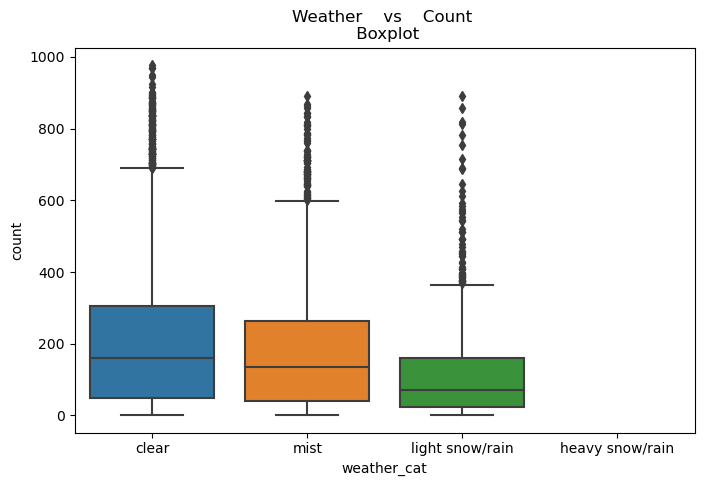

In [28]:
# Boxplot for weather vs count
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = 'weather_cat', y = 'count')
plt.title('Weather    vs    Count \n Boxplot')
plt.show()

**Observations**
- The median of count in clear weather condition is high when compared with other two weather conditions
- The median of count in light snow/rain weather condition is low when compared with other weather conditions

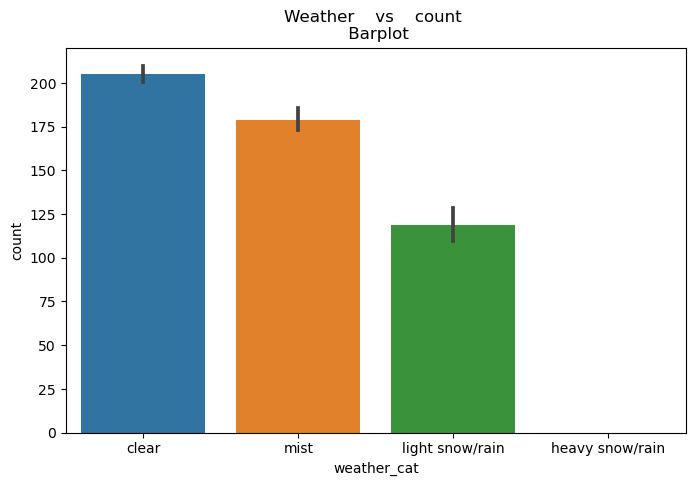

In [29]:
# Barplot for weather vs count
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = 'weather_cat', y = 'count')
plt.title('Weather    vs    count \n Barplot')
plt.show()

**Observation**
- The barplot also confirms the same that the average number of cycles rented in clear weather condition is high and in light snow/rain is low in our given sample.

## Hypothesis Testing

Let's statistically confirm the observations obtained from the visual analysis of sample data by using hypothesis testing for the population with a significance level $\alpha = 0.05$.

In [30]:
alpha = 0.05

### 1. Does the Working day has an effect on the number of electric cycles rented ?

Let's first define the null and alternate hypothesis for this problem statement.

>$H_0$ : Average count of cycles rented in working day is less than or equal to the average count in non working day $( \mu_1 \leq \mu_2 )$

>$H_a$ : Average count of cycles rented in working day is greater than the average count in non working day $( \mu_1 > \mu_2 )$

where $\mu_1$ is the mean count of cycles rented in working day, $\mu_2$ is the mean count of cycles rented in non working day

The average number of cycles rented in working and non working days are independant from each other. Also we have to prove that mean of one is greater than the other and the standard deviation of the population is not known, the student's t test for 2 independant samples would be appropriate for this case.
 

In [31]:
# Lets take samples from both the categories
work = df[df['workingday_cat'] == 'yes']['count']
nwork = df[df['workingday_cat'] == 'no']['count']

In [32]:
# Lets check the standard deviation of our samples
print(work.std(), nwork.std())

184.52580111109822 173.72401532500032


The samples have different variances, so the t test ind for inequal variance would be appropriate

In [33]:
# Lets find the p_value from ttest and compare it with significance level alpha
test_stats, p_value = ttest_ind(work, nwork, equal_var = False, alternative = 'greater')
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 1.2372752169779413
P-value : 0.10801270219426112
alpha : 0.05
Fail to reject H0


**Observation**
- The p value is 0.108 and it is greater than significance level of 0.05, so we will fail to reject the null hypothesis $H_0$, which means the average number of cycles rented in the working day is not greater than the non working day. Hence the observation that the working day has no significant effect in number of cycles rented is statistically verified with a confidence 95%

## 2. Is number of cycles rented is similar or different in different weather conditions ?

Let's first define the null and alternate hypothesis for this problem statement.

>$H_0$ : Average number of cycles rented is similar in different weather conditions

>$H_a$ : Average number of cycles rented is different in atleast one weather condition

The number of cycles rented in different weather conditions are independant from each other, we have more than two weather conditions. Therefore, oneway annova or kruskal wallis test would be appropriate for this case.

Test Assumptions: For the oneway annova test to be used, the sample should follow these assumptions,
- Normality: The sample should follow normal distribution,
- Equal variance: The different variables should have equal variance,
- Dependancy: The variables should be independant

**Test assumption check:**

**1. Normality:**
Let's check whether the distribution is normal by using visual analysis.

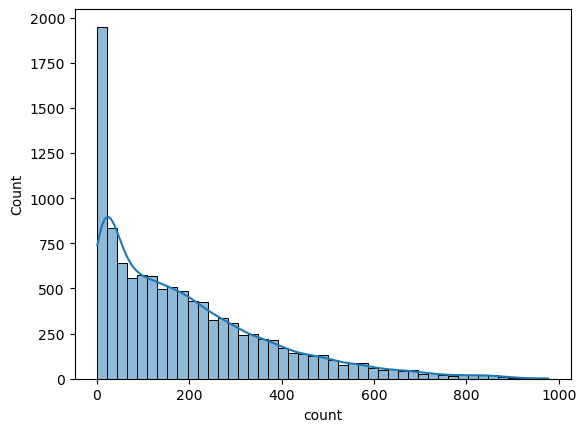

In [34]:
# Lets check the Distribution of count
sns.histplot(df['count'], kde = True)
plt.show()

The distribution looks log normal. Lets check the distribution after taking log

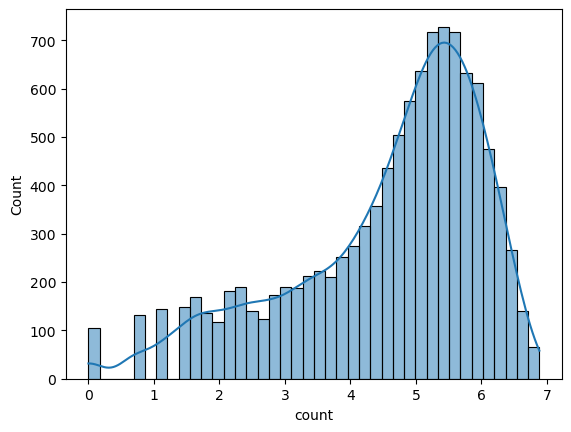

In [35]:
# Distribution of log of count
sns.histplot(np.log(df['count']), kde = True)
plt.show()

Even after taking log, the distribution looks left skewed and not normal. Lets verify the normality of log(count) with qq plot and shapiro wilk's test

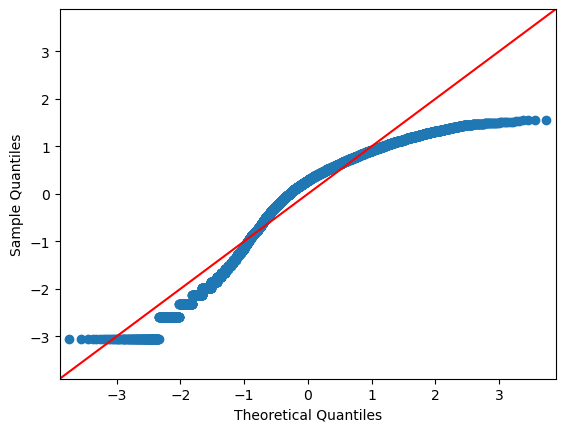

In [36]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data = np.log(df['count']),dist = norm,fit = True, line = '45')
plt.show()

The qq plot confirms that the distribution is not normal, also after taking the log of count. Let's reconfirm this with shapiro wilk's test.

**Shapiro wilk Test:**

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
> $H_0$ : Distribution is normal

> $H_a$ : Distribution is not normal

In [37]:
# Lets find the p_value from ttest and compare it with significance level alpha
test_stat, p_value = shapiro(np.log(df['count']))
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 1.2372752169779413
P-value : 0.0
alpha : 0.05
Reject H0


C:\Users\v9746\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The p value is 0, so we will reject the null hypothesis. Therefore, it is statistically proved that the distribution is not normal.

Eventhough the test for normality is failed, we can still go on with oneway anova test, because of the central limit theorem.

**2. Equal variance:** Lets check the assumption of equal variance by using levene test.

The Levene test tests the null hypothesis that all input samples are from populations with equal variances
> $H_0$ : Samples have equal variance

> $H_a$ : Samples have different variances

In [38]:
# Extracting the data for different weather condition
clear = df[df['weather_cat']=='clear']['count']
mist = df[df['weather_cat']=='mist']['count']
lsr = df[df['weather_cat']=='light snow/rain']['count']

In [39]:
# Running levene test
test_stat, p_value = levene(clear, mist, lsr)
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 1.2372752169779413
P-value : 6.198278710731511e-36
alpha : 0.05
Reject H0


The test for assumption of equal variance also failed. But still annova can be used or we can either use kruskal wallis test also. Let's try both test and compare the difference. 

### ANNOVA

>Null hypothesis, $(H_0)$ : Average number of cycles rented is similar in different weather conditions

>Alternate hypothesis, $(H_a)$ : Average number of cycles rented is different in atleast one weather condition

In [40]:
# Running one way annova test
test_stat, p_value = f_oneway(clear, mist, lsr)
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 1.2372752169779413
P-value : 4.976448509904196e-43
alpha : 0.05
Reject H0


The p_value is very small and less than alpha, we will reject our null hypothesis. But lets reconfirm this result with kruskal test

In [41]:
# Running kruskal wallis test
test_stat, p_value = kruskal(clear, mist, lsr)
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 1.2372752169779413
P-value : 3.122066178659941e-45
alpha : 0.05
Reject H0


The kruskal wallis test also gave the same result

**Observation**
- The p value is very low and it is lesser than significance level of 0.05, so we will reject the null hypothesis $H_0$ which means the average number of cycles rented in different weather conditions are not same and the weather has impact on count. Hence the observation that the weather has significant effect in number of cycles rented is statistically verified with a confidence 95%

## 3. Is number of cycles rented is similar or different in different seasons ?

Let's first define the null and alternate hypothesis for this problem statement.

>$H_0$ : Average number of cycles rented is similar in different seasons

>$H_a$ : Average number of cycles rented is different in atleast one seasons

The number of cycles rented in different seasons are independant from each other, we have more than two seasons. Therefore, oneway annova or kruskal wallis test would be appropriate for this case.

Test Assumptions: For the oneway annova test to be used, the sample should follow these assumptions,
- Normality: The sample should follow normal distribution,
- Equal variance: The different variables should have equal variance,
- Dependancy: The variables should be independant

**1. Normality** 

The test for normality was already done and it failed for previous case. Since here also the count is same, we don't need to do it once again.

**2. Equal variance:** Lets check the assumption of equal variance by using levene test.

The Levene test tests the null hypothesis that all input samples are from populations with equal variances
> $H_0$ : Samples have equal variance

> $H_a$ : Samples have different variances

In [42]:
# Extracting the data for different seasons
summer = df[df['season_cat']=='summer']['count']
winter = df[df['season_cat']=='winter']['count']
spring = df[df['season_cat']=='spring']['count']
fall = df[df['season_cat']=='fall']['count']

In [43]:
# Running levene test
test_stat, p_value = levene(summer, winter, spring, fall)
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 1.2372752169779413
P-value : 1.1170990373788981e-118
alpha : 0.05
Reject H0


The test for assumption of equal variance also failed. But still annova can be used or we can either use kruskal wallis test also. Let's try both test and compare the difference. 

### ANNOVA

>Null hypothesis, $(H_0)$ : Average number of cycles rented is similar in different seasons

>Alternate hypothesis, $(H_a)$ : Average number of cycles rented is different in atleast one season

In [44]:
# Running one way annova test
test_stat, p_value = f_oneway(summer, winter, spring, fall)
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 1.2372752169779413
P-value : 6.204069471997093e-149
alpha : 0.05
Reject H0


The p_value is very small and less than alpha, we will reject our null hypothesis. But lets reconfirm this result with kruskal test

In [45]:
# Running kruskal wallis test
test_stat, p_value = kruskal(summer, winter, spring, fall)
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 1.2372752169779413
P-value : 2.2263612957303657e-151
alpha : 0.05
Reject H0


The kruskal wallis test also gave the same result

**Observation**
- The p value is very low and it is lesser than significance level of 0.05, so we will reject the null hypothesis $H_0$ which means the average number of cycles rented in different seasons are not same and the season has impact on count. Hence the observation that the season has significant effect in number of cycles rented is statistically verified with a confidence 95%

## 4. Does the weather is dependent on the season ?

Let's first define the null and alternate hypothesis for this problem statement.

>$H_0$ : Weather is independent of season

>$H_a$ : Weather is dependent on season

we have two categorical columns to check for dependancy. Therefore, chi square test would be appropriate for this case.

In [47]:
pd.crosstab(df['weather_cat'], df['season_cat'])

season_cat,spring,summer,fall,winter
weather_cat,,,,
clear,1759,1801,1930,1702
mist,715,708,604,807
light snow/rain,211,224,199,225


In [46]:
# Running chi square test
test_stats, p_value, dof, exp = chi2_contingency(pd.crosstab(df['weather_cat'], df['season_cat']))
print('Test statistic :', test_stats)
print('P-value :', p_value)
print('alpha :', alpha)
if p_value < alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Test statistic : 46.101457310732485
P-value : 2.8260014509929403e-08
alpha : 0.05
Reject H0


The p_value is very small and less than alpha, we will reject our null hypothesis.

**Observation**
- The p value is very low and it is lesser than significance level of 0.05, so we will reject the null hypothesis $H_0$ which means the season has impact on weather. Hence the observation that the season has significant effect on weather is statistically verified with a confidence 95%

## Insights

- The data given ranges from the date - 1st of Jan, 2011 to 19th of Dec, 2012
- The total count per hour ranges from 1 to 977 with an average of 191.5 and there is a gap between mean and median of the total count, so there might be some outliers in the data.
- It seems that 68% of the given data are from working days and only 2% from holidays.
- The distribution of the count column looks right skewed and look like log normal distribution
- Almost 98% of the data is from non holidays
- Almost 70% of the data is from working days
- The weather is clear in almost 65% of the data
- The working day and non working day both has almost same range of distribution and the median of them are also almost same. So the working day has no significant effect on the number of cycles rented
- The barplot also shows the same that the average number of cycles rented on working day and the non working day are almost same. So it again confirms that working day has no significant effect on count in our given sample
- The median count of the cycles rented is low in the spring season compared with all other seasons
- The median count of the cycles rented is more in the fall season compared with all other seasons
- The barplot also confirms the same that the average cycles rented is more in the fall season and less in the spring season in our given sample
- The median of count in clear weather condition is high when compared with other two weather conditions
- The median of count in light snow/rain weather condition is low when compared with other weather conditions
- The barplot also confirms the same that the average number of cycles rented in clear weather condition is high and in light snow/rain is low in our given sample.
- While checking if Working Day has an effect on the number of electric cycles rented, the p value is 0.108 and it is greater than significance level of 0.05, so we will fail to reject the null hypothesis $H_0$, which means the average number of cycles rented in the working day is not greater than the non working day. Hence the observation that the working day has no significant effect in number of cycles rented is statistically verified with a confidence 95%
- While checking if No. of cycles rented is similar or different in different weather, the p value is very low and it is lesser than significance level of 0.05, so we will reject the null hypothesis $H_0$ which means the average number of cycles rented in different weather conditions are not same and the weather has impact on count. Hence the observation that the weather has significant effect in number of cycles rented is statistically verified with a confidence 95%
- While checking if No. of cycles rented is similar or different in different seasons, the p value is very low and it is lesser than significance level of 0.05, so we will reject the null hypothesis $H_0$ which means the average number of cycles rented in different seasons are not same and the season has impact on count. Hence the observation that the season has significant effect in number of cycles rented is statistically verified with a confidence 95%
- while checking if Weather is dependent on the season, the p value is very low and it is lesser than significance level of 0.05, so we will reject the null hypothesis $H_0$ which means the season has impact on weather. Hence the observation that the season has significant effect on weather is statistically verified with a confidence 95%

## Recommendations

- The weather and seasons are the variables which are significant in predicting the demand for shared electric cycles in the Indian market
- The company would expect a high demand on fall season and clear weather. So it is recommended to make sure the availability of the cycles at that time to face the demand 
- The company would expect a low demand on spring season and light snow/rain weather condition. So it is recommended to plan maintenance activities of cycles at that time.
- Also the company can provide more offers for riders on low demand seasons to attract more riders